<a href="https://colab.research.google.com/github/vladtsyp/study_deeplearning/blob/main/task_4/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №4. Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [ ]:
# Ваш код #
# зависимости
from keras import models
from keras.datasets import cifar100 # импорт исходного датасета
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Activation, Dropout
import keras.utils
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from imutils import paths
import random
import cv2, os
import pickle
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [ ]:
# выгружаем метки
with open('/content/drive/MyDrive/Colab Notebooks/task_4/meta', 'rb') as fo:
    metadata = pickle.load(fo) #, encoding='bytes'
classes_dict = dict(list(enumerate(metadata['fine_label_names'])))

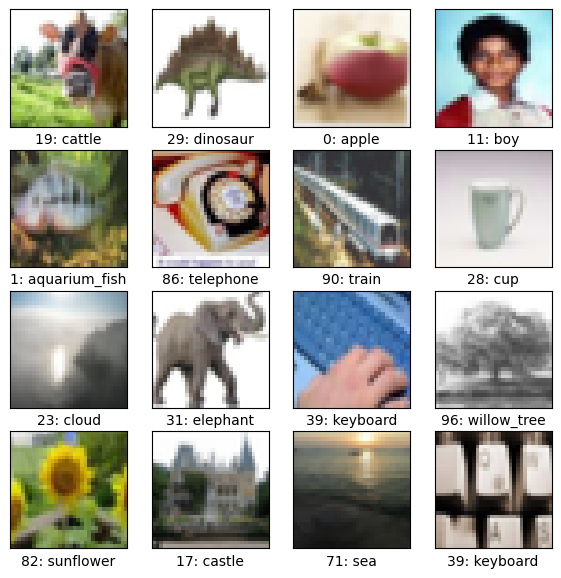

In [ ]:
# визуализация из датасета
plt.figure(figsize=(7, 7))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j = i + 0
    plt.imshow(x_train[j])
    title = str(y_train[i][0])+': '+str(classes_dict[y_train[i][0]])
    plt.xlabel(title)
plt.show()

In [ ]:
# нормализация данных
x_train_n = np.array(x_train, dtype="float") / 255.0
x_test_n = np.array(x_test, dtype="float") / 255.0

# конвертируем метки из целых чисел в векторы
lb = LabelBinarizer()
y_train_n = lb.fit_transform(y_train)
y_test_n = lb.transform(y_test)

# вывод размерности
print(x_train_n.shape, x_test_n.shape)
print(y_train_n.shape, y_test_n.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 100) (10000, 100)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [ ]:
# Ваш код #
model_1 = Sequential([
    # чем больше свёрточных слоёв, тем больше карт признаков => высокоуровневая абстракция
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    #Conv2D(256, (3, 3), padding='same', activation='relu'),
    #MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 128)       

Обучите созданную модель

In [ ]:
# Ваш код #
SPEED = 0.0001 #0.00001

model_1.compile(optimizer=Adam(learning_rate=SPEED),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
EPOCH = 200
BS = 500

his_1 = model_1.fit(x_train_n, y_train_n, validation_data=(x_test_n, y_test_n), batch_size=BS, epochs=EPOCH)

Epoch 1/200
100/100 [==============================] - 3s 26ms/step - loss: 4.5748 - accuracy: 0.0205 - val_loss: 4.4994 - val_accuracy: 0.0307
Epoch 2/200
100/100 [==============================] - 2s 20ms/step - loss: 4.3331 - accuracy: 0.0525 - val_loss: 4.1670 - val_accuracy: 0.0728
Epoch 3/200
100/100 [==============================] - 2s 18ms/step - loss: 4.0467 - accuracy: 0.0930 - val_loss: 3.9711 - val_accuracy: 0.0987
Epoch 4/200
100/100 [==============================] - 2s 18ms/step - loss: 3.8777 - accuracy: 0.1232 - val_loss: 3.8282 - val_accuracy: 0.1326
Epoch 5/200
100/100 [==============================] - 2s 18ms/step - loss: 3.7514 - accuracy: 0.1468 - val_loss: 3.7261 - val_accuracy: 0.1498
Epoch 6/200
100/100 [==============================] - 2s 18ms/step - loss: 3.6553 - accuracy: 0.1627 - val_loss: 3.6529 - val_accuracy: 0.1599
Epoch 7/200
100/100 [==============================] - 2s 19ms/step - loss: 3.5740 - accuracy: 0.1765 - val_loss: 3.5804 - val_accuracy:

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [ ]:
# Ваш код #
model_2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),

    Flatten(),

    Dense(128),
    BatchNormalization(),
    Dense(100),
    Activation('softmax')
])

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)       

Обучите созданную модель

In [ ]:
model_2.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
# Ваш код #
his_2 = model_2.fit(x_train_n, y_train_n, validation_data=(x_test_n, y_test_n), batch_size=500, epochs=50)

Epoch 1/50
100/100 [==============================] - 4s 29ms/step - loss: 4.2143 - accuracy: 0.0907 - val_loss: 4.7370 - val_accuracy: 0.0137
Epoch 2/50
100/100 [==============================] - 2s 24ms/step - loss: 3.6264 - accuracy: 0.1797 - val_loss: 4.7774 - val_accuracy: 0.0137
Epoch 3/50
100/100 [==============================] - 2s 25ms/step - loss: 3.3586 - accuracy: 0.2284 - val_loss: 4.5485 - val_accuracy: 0.0419
Epoch 4/50
100/100 [==============================] - 3s 26ms/step - loss: 3.1545 - accuracy: 0.2683 - val_loss: 4.0575 - val_accuracy: 0.0996
Epoch 5/50
100/100 [==============================] - 3s 25ms/step - loss: 2.9866 - accuracy: 0.3005 - val_loss: 3.5566 - val_accuracy: 0.1938
Epoch 6/50
100/100 [==============================] - 2s 24ms/step - loss: 2.8427 - accuracy: 0.3293 - val_loss: 3.1799 - val_accuracy: 0.2681
Epoch 7/50
100/100 [==============================] - 3s 25ms/step - loss: 2.7171 - accuracy: 0.3555 - val_loss: 2.9726 - val_accuracy: 0.3017

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [ ]:
# Ваш код #
model_3 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.2),

    Flatten(),
    Dense(64),
    Activation('relu'),
    Dropout(0.2),
    Dense(100),
    Activation('softmax')
])
model_3.compile(optimizer=Adam(learning_rate=SPEED),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 64)         

Обучите созданную модель

In [ ]:
# Ваш код #
his_3 = model_3.fit(x_train_n, y_train_n, validation_data=(x_test_n, y_test_n), batch_size=BS, epochs=350)

Epoch 1/350
100/100 [==============================] - 3s 25ms/step - loss: 4.5966 - accuracy: 0.0144 - val_loss: 4.5718 - val_accuracy: 0.0266
Epoch 2/350
100/100 [==============================] - 2s 20ms/step - loss: 4.5063 - accuracy: 0.0288 - val_loss: 4.4269 - val_accuracy: 0.0447
Epoch 3/350
100/100 [==============================] - 2s 23ms/step - loss: 4.3711 - accuracy: 0.0436 - val_loss: 4.2769 - val_accuracy: 0.0654
Epoch 4/350
100/100 [==============================] - 2s 22ms/step - loss: 4.2546 - accuracy: 0.0574 - val_loss: 4.1572 - val_accuracy: 0.0778
Epoch 5/350
100/100 [==============================] - 2s 20ms/step - loss: 4.1655 - accuracy: 0.0670 - val_loss: 4.0686 - val_accuracy: 0.0872
Epoch 6/350
100/100 [==============================] - 2s 20ms/step - loss: 4.0991 - accuracy: 0.0756 - val_loss: 4.0082 - val_accuracy: 0.1002
Epoch 7/350
100/100 [==============================] - 2s 20ms/step - loss: 4.0453 - accuracy: 0.0830 - val_loss: 3.9419 - val_accuracy:

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
# Ваш код #
model_4 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same'),
    MaxPooling2D((2, 2), strides=2),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),

    Flatten(),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(100),
    Activation('softmax')
])
#    Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
#    MaxPooling2D(pool_size=(2, 2), strides=2),
#    BatchNormalization(),
#    Conv2D(64, (3, 3), padding='same', activation='relu'),
#    MaxPooling2D((2, 2), strides=2),
#    BatchNormalization(),
#    Flatten(),
#    Dense(64),
#    Activation('relu'),
#    Dropout(0.5),
#    Dense(100),
#    Activation('softmax')
#])
model_4.compile(optimizer=Adam(learning_rate=SPEED),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_14 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 dropout_12 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)       

Обучите созданную модель

In [ ]:
# Ваш код #
his_4 = model_4.fit(x_train_n, y_train_n, validation_data=(x_test_n, y_test_n), batch_size=BS, epochs=120)

Epoch 1/120
100/100 [==============================] - 4s 30ms/step - loss: 4.5802 - accuracy: 0.0261 - val_loss: 4.6290 - val_accuracy: 0.0136
Epoch 2/120
100/100 [==============================] - 3s 26ms/step - loss: 4.3489 - accuracy: 0.0576 - val_loss: 4.6415 - val_accuracy: 0.0167
Epoch 3/120
100/100 [==============================] - 2s 23ms/step - loss: 4.2268 - accuracy: 0.0796 - val_loss: 4.5714 - val_accuracy: 0.0219
Epoch 4/120
100/100 [==============================] - 2s 23ms/step - loss: 4.1282 - accuracy: 0.0969 - val_loss: 4.4182 - val_accuracy: 0.0487
Epoch 5/120
100/100 [==============================] - 2s 22ms/step - loss: 4.0450 - accuracy: 0.1113 - val_loss: 4.2427 - val_accuracy: 0.0861
Epoch 6/120
100/100 [==============================] - 2s 22ms/step - loss: 3.9687 - accuracy: 0.1237 - val_loss: 4.0822 - val_accuracy: 0.1199
Epoch 7/120
100/100 [==============================] - 2s 25ms/step - loss: 3.8967 - accuracy: 0.1379 - val_loss: 3.9688 - val_accuracy:

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

In [ ]:
def plot_history(his, title_n='Simple CNN', EPOCH=5):
  N = np.arange(0, EPOCH)
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(N, his.history["loss"], label="train_loss")
  plt.plot(N, his.history["val_loss"], label="val_loss")
  plt.plot(N, his.history["accuracy"], label="train_accuracy")
  plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
  plt.title("Training Loss and Accuracy ("+title_n+')')
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

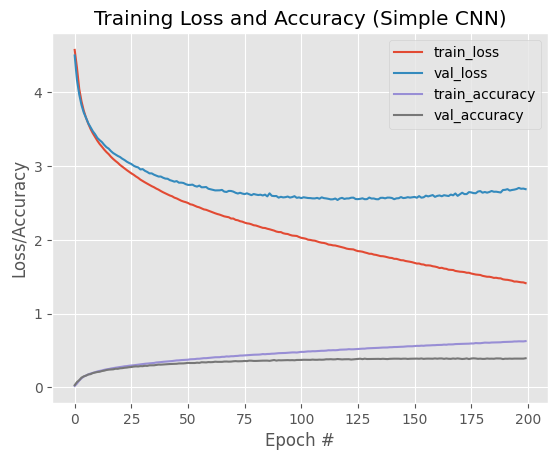

In [ ]:
plot_history(his_1, EPOCH=200)

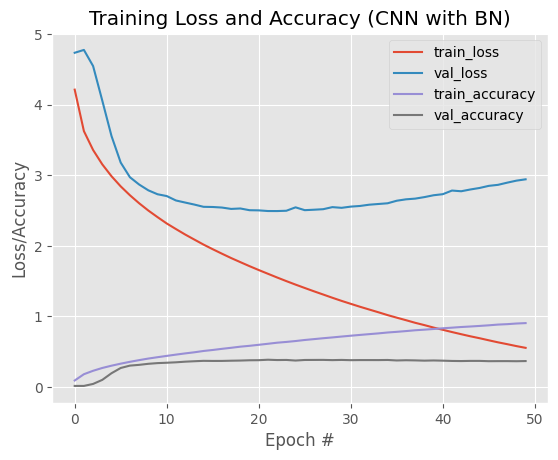

In [ ]:
plot_history(his_2, 'CNN with BN', 50)

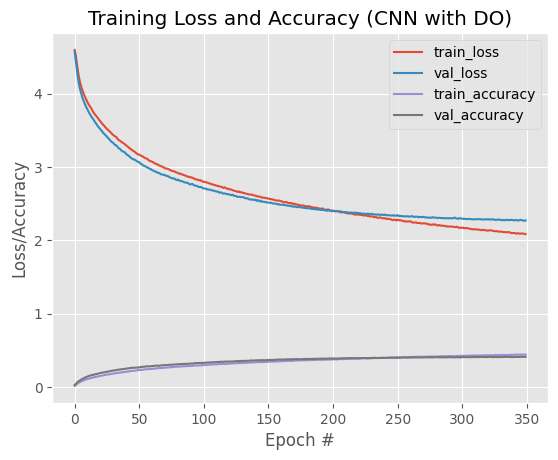

In [ ]:
plot_history(his_3, 'CNN with DO', 350)

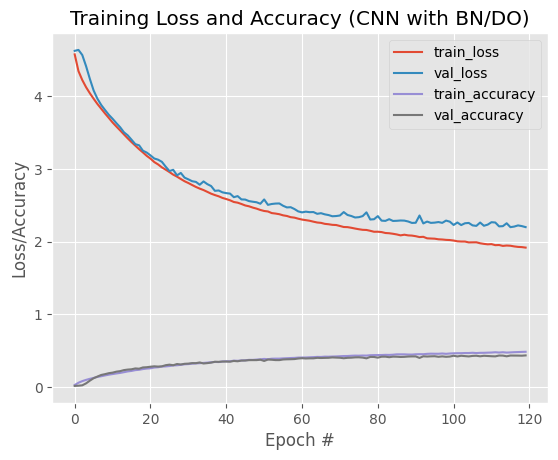

In [ ]:
plot_history(his_4, 'CNN with BN/DO', 120)

### Ваши выводы  
  
Модель №|Кол-во параметров|BatchNorm|DropOut|Скорость|BatchSize|Кол-во эпох|acc|val_acc|Время (сек)
---|---|---|---|---|---|---|---|---|---
1|368420|-|-|0.0001|500|200|0.628|0.395|395
2|369828|+|-|0.0001|500|50|0.9|0.366|131
3|288100|-|+|0.0001|500|350|0.442|0.411|804
4|288740|+|+|0.0001|500|120|0.484|0.434|284

### Ваш итог  
Лучшие модели №3 (c DropOut) и №4 (с DO и BN), исходя из графиков обучения и таблицы. Также можно выделить модель №4 лучшей, так как на её обучение потребовалось в 3 раза меньше времени.